# Import all the neccessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import re
import gensim
import spacy
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader, TensorDataset

from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import re
import gensim
import spacy
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader, TensorDataset

from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
import warnings
from sklearn.exceptions import ConvergenceWarning


# Loading of the dataset

In [2]:
import pandas as pd
from pathlib import Path

# Define the file path using pathlib
file_path = Path(r"C:\users\746195\OneDrive - hull.ac.uk\Desktop\archive (4)\Reviews.csv")

# Load the CSV file into a DataFrame
reviews_df = pd.read_csv(file_path)



# Data exploration and visualization

In [3]:
# Display the first few rows of the DataFrame to verify the data
reviews_df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
reviews_df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [5]:
reviews_df.shape # Display the shape of the dataset

(568454, 10)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
reviews_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
missing_profilename = reviews_df[reviews_df['ProfileName'].isnull()]
missing_profilename

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10616,10617,B002DHN956,A1LSYR30XW7CFT,NaN,1,2,5,1291680000,Awesome,This is 72 for the price of like 24 at the gro...
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
47923,47924,B004SRH2B6,A2DEHJJIEAPPBF,NaN,0,0,5,1338940800,Great taste,Enjoy drinking this brand. Tastes as good as ...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
121819,121820,B006N3I2SK,A34F9B57SYQ5XR,NaN,0,0,5,1335312000,Exactly what I ordered,"Very good coffee, very good price. It can be ..."
125452,125453,B001EO6ESS,A34F9B57SYQ5XR,NaN,0,0,5,1335312000,Exactly what I ordered,"Very good coffee, very good price. It can be ..."
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...


In [9]:
missing_summary = reviews_df[reviews_df['Summary'].isnull()]
missing_summary

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
155712,155713,B0009VO58S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
178290,178291,B00073IVAQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
198474,198475,B000FVBYCW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
212691,212692,B00020HHAO,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
237565,237566,B000ELGPAO,A15AMT9T9A1309,Film-Friend,1,1,3,1328572800,NaN,This is a cool system only problem is that the...


In [10]:
reviews_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [11]:
reviews_df.duplicated().sum()


0

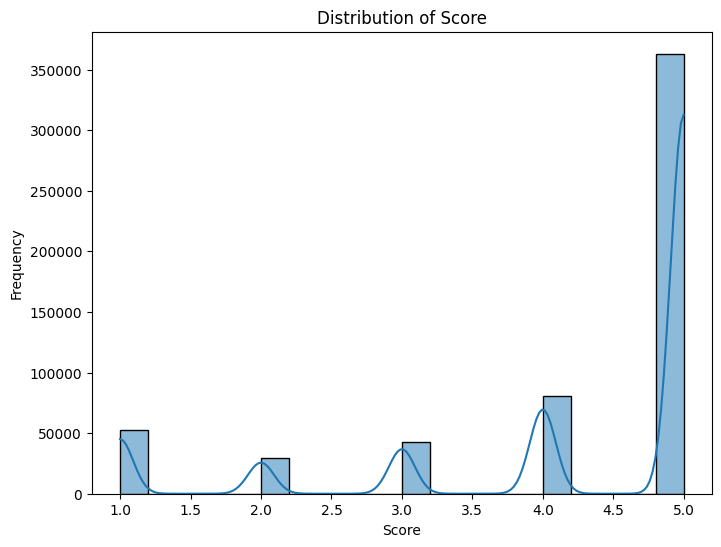

In [12]:
# Visualize the distribution of Score column
plt.figure(figsize=(8, 6))
sns.histplot(data=reviews_df, x='Score', bins=20, kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


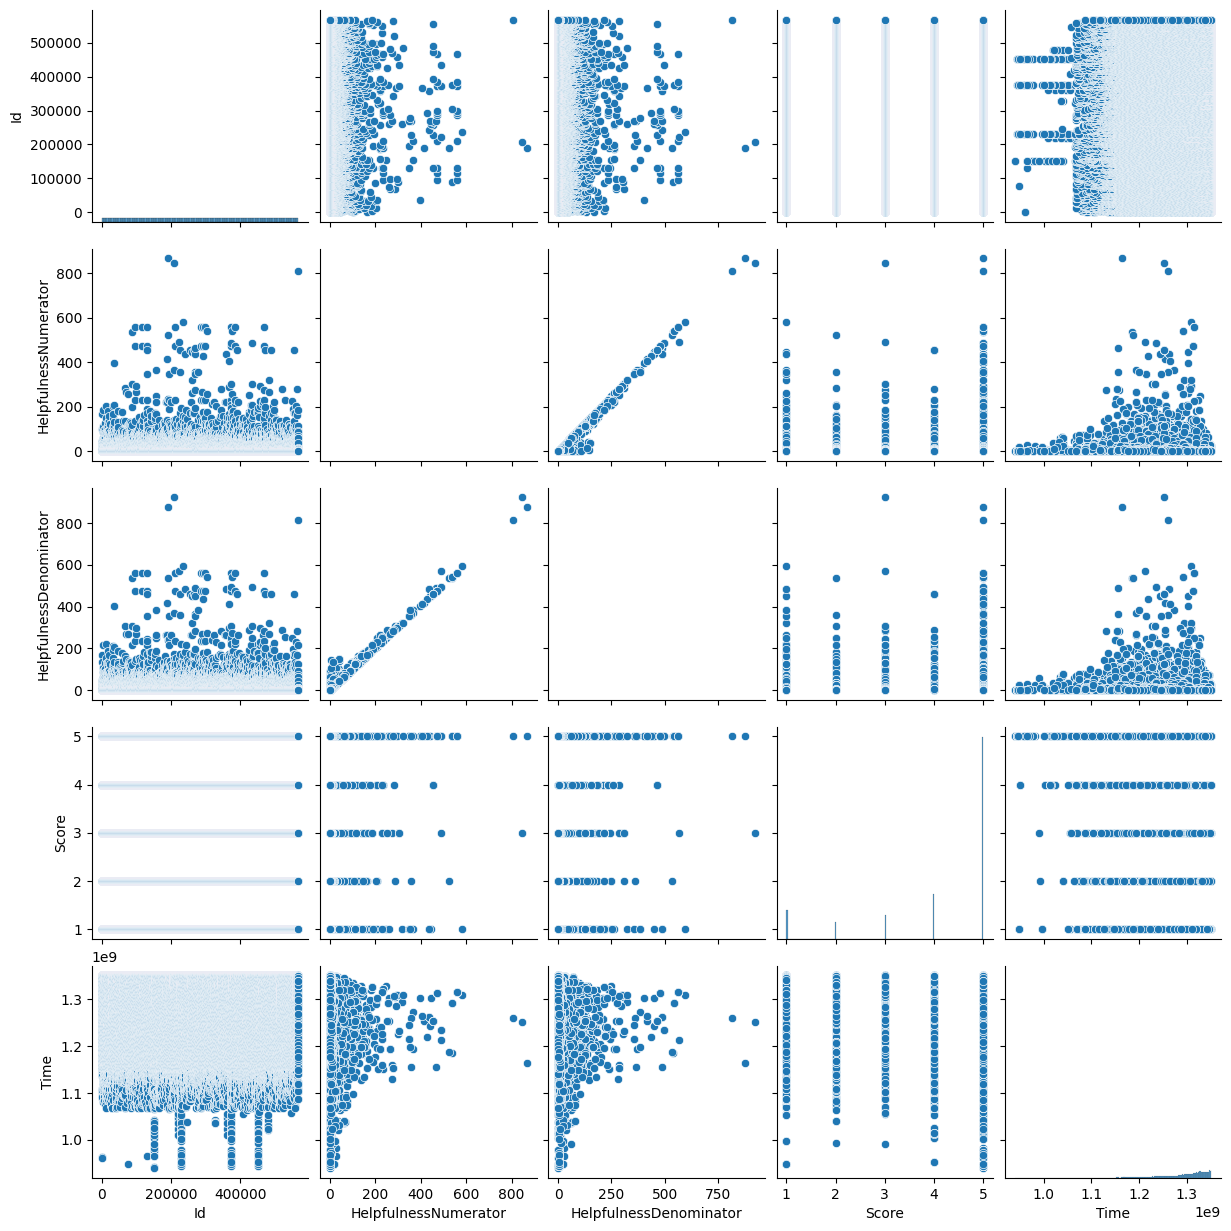

In [13]:
# Visualize numerical columns using pairplot
sns.pairplot(reviews_df)
plt.show()


In [14]:

numerical_columns = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']

# Select numerical columns and calculate correlation matrix
correlation_matrix = reviews_df[numerical_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
HelpfulnessNumerator,1.000000,0.974689,-0.032590,-0.154818
HelpfulnessDenominator,0.974689,1.000000,-0.097986,-0.173289
Score,-0.032590,-0.097986,1.000000,-0.062760
Time,-0.154818,-0.173289,-0.062760,1.000000


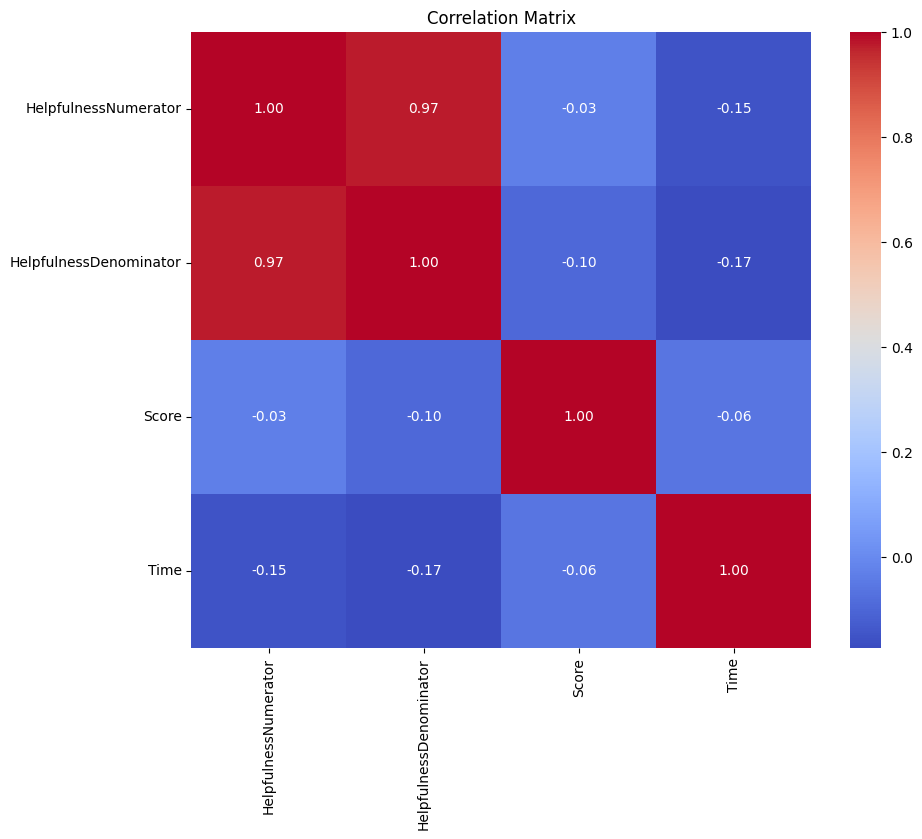

In [15]:

# Assuming correlation_matrix is your correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Data cleaning

## Handling rows with missing item:

In [16]:
missing_profilename = reviews_df[reviews_df['ProfileName'].isnull()]
missing_summary = reviews_df[reviews_df['Summary'].isnull()]


- Generally speaking, it might make sense to fill in the blanks in "ProfileName" and "Summary" with constant placeholders like "Unknown" and "No Summary" if the missing values are sparse and dispersed arbitrarily. It's straightforward and only assumes that the numbers are missing, not anything more about the data.

- In this case the missing item are relatively few and therefore we implement cleaning of the data as expressed below:

In [17]:
# Fill missing values in 'ProfileName' with 'Unknown'
reviews_df['ProfileName'].fillna('Unknown', inplace=True)

# Fill missing values in 'Summary' with 'No Summary'
reviews_df['Summary'].fillna('No Summary', inplace=True)


In [18]:
reviews_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

## Handling duplicates

In [19]:
def check_duplicate_rows(df, columns_to_check):
    group_counts = df.groupby(columns_to_check).size()
    duplicate_groups = group_counts[group_counts > 1]
    duplicate_indices = duplicate_groups.index
    duplicate_rows = df[df.set_index(columns_to_check).index.isin(duplicate_indices)]
    return duplicate_rows

columns_to_check = ['UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

duplicate_rows = check_duplicate_rows(reviews_df, columns_to_check)
sorted_duplicate_rows = duplicate_rows.sort_values(by=['UserId', 'ProductId'])

reviews_df.drop(sorted_duplicate_rows.index, inplace=True)

reviews_df.sort_values(by=['UserId', 'ProductId'], inplace=True)


In [20]:
sorted_duplicate_rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
83317,83318,B005ZBZLT4,#oc-R115TNMSPFT9I7,Breyton,2,3,2,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...
180871,180872,B007Y59HVM,#oc-R115TNMSPFT9I7,Breyton,2,3,2,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...
455533,455534,B005HG9ERW,#oc-R11D9D7SHXIJB9,"Louis E. Emory ""hoppy""",0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
290947,290948,B005HG9ESG,#oc-R11D9D7SHXIJB9,"Louis E. Emory ""hoppy""",0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
496893,496894,B005HG9ET0,#oc-R11D9D7SHXIJB9,"Louis E. Emory ""hoppy""",0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
...,...,...,...,...,...,...,...,...,...,...
231423,231424,B003FDC2I2,AZZU1VEO8KUXH,"Mia P ""Mia P""",1,1,5,1317513600,NOT like the others,I bought this for my 13 year old daughter who ...
404100,404101,B003FDG4K4,AZZU1VEO8KUXH,"Mia P ""Mia P""",1,1,5,1317513600,NOT like the others,I bought this for my 13 year old daughter who ...
294984,294985,B005V9UG18,AZZU1VEO8KUXH,"Mia P ""Mia P""",1,1,5,1317513600,NOT like the others,I bought this for my 13 year old daughter who ...
414106,414107,B0029XEXZE,AZZU4D6TZ2L6J,"Sherry King ""llamasmama""",2,2,5,1247875200,cheese,My father thought this was the best cheese eve...


In [21]:
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
136322,136323,B006Q820X0,#oc-R103C0QSV1DF5E,C,1,2,5,1343088000,Great for the Price,I have to say I was a little apprehensive to b...
516061,516062,B008I1XPKA,#oc-R109MU5OBBZ59U,AayGee,0,1,5,1350086400,AWESOME Coffee!!!!,Received my free K cups as a sample promotion ...
516078,516079,B008I1XPKA,#oc-R10LFEMQEW6QGZ,Julie,0,1,5,1345939200,Brooklyn Bean Roastery Breakfast Blend K-Cups,Brooklyn Bean Roastery Blend K-Cups are great ...
378692,378693,B0026LJ3EA,#oc-R10LT57ZGIB140,dipr,0,0,3,1310601600,Some damage,The shipment of the dog food was quick. Howev...
136544,136545,B006Q820X0,#oc-R10UA029WVWIUI,Kim D,0,0,1,1342483200,Less than satisfactory. I gave the Brooklyn K...,"Brooklyn ""French Roast"" K-Cup Coffee is not on..."
...,...,...,...,...,...,...,...,...,...,...
422837,422838,B003SNX4YA,AZZV9PDNMCOZW,"Anne B. Ward ""Dr Anne B""",0,0,4,1329436800,I like it,Even though this mix is not as spicy as I anti...
190697,190698,B000FI4O90,AZZVNIMTTMJH6,sugarwaif,0,0,5,1268179200,pretty amazing,i've wanted one of these since i saw it in an ...
222780,222781,B000N9VLJ2,AZZY649VYAHQS,Worldwide1,1,1,5,1309737600,I Have Spoken.,All of the chocolate arrived with out melting ...
131468,131469,B001SB22UG,AZZYCJOJLUDYR,"Hazel MccLellan ""H.M.""",0,0,5,1337472000,Amazing flavor!!,I use this all the time! Good for BBQ ing or p...


In [22]:
reviews_df.shape

(339326, 10)

## Update a sentiment column

In [23]:
# Convert the 'Score' column to numeric
reviews_df['Score'] = pd.to_numeric(reviews_df['Score'], errors='coerce')

# Define a function to label the sentiment based on the score
def label_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score <= 2:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column 'sentiment' based on the 'Score' column
reviews_df['sentiment'] = reviews_df['Score'].apply(label_sentiment)



In [26]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(sentence, deacc=False))

In [27]:
data = reviews_df['Text'][:500].to_list()


In [28]:
data_words = list(sent_to_words(data))


In [29]:
# Generate the bigrams and trigrams


In [30]:


# Assuming `data_words` is your list of tokenized words
bigram = gensim.models.phrases.Phrases(data_words, min_count=5, threshold=100)


In [31]:
bigram[data_words]


In [32]:
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)


In [33]:
trigram

In [34]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [35]:
bigram_mod

In [36]:
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [37]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)

at_least
brooklyn_bean
bean_roastery
breakfast_blend
donut_shop
brooklyn_bridge
dog_food
french_roast
gift_basket
after_reading
chocolate_covered
individually_wrapped
bridge_blend
customer_service
green_mountain
extra_bold
quality_control
highly_recommend
corner_donut
variety_pack
full_bodied
sampler_pack
single_serve
brewers_count
jet_fuel
medium_roast
href_http
http_www
www_amazon
amazon_com
com_gp
gift_baskets
grocery_store
gluten_free
vine_program


In [38]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram)

at_least
brooklyn_bean
brooklyn_bean_roastery
breakfast_blend
donut_shop
brooklyn_bridge
the_brooklyn_bridge
dog_food
french_roast
gift_basket
after_reading
chocolate_covered
individually_wrapped
brooklyn_beans
customer_service
green_mountain
extra_bold
quality_control
highly_recommend
sample_pack
from_brooklyn_bean
variety_pack
dark_roast
sampler_pack
single_serve
brewers_count
medium_roast
com_gp_product
gift_baskets
grocery_store
boardwalk_blend
gluten_free
vine_program


## Lemmatisation and Stopwords

In [39]:
my_stop_words = STOPWORDS.union(set(['br']))

In [40]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

In [41]:
data_words_no_stops = remove_stopwords(data_words)

In [42]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [43]:
data_words_bigrams = make_bigrams(data_words_no_stops)
data_words_trigrams = make_trigrams(data_words_no_stops)

In [44]:
for i, text in enumerate(data_words_trigrams):
    for word in text:
        if "_" in word:
            print(i, word)

2 brooklyn_bean_roastery
2 breakfast_blend
2 donut_shop
2 brooklyn_bridge
2 breakfast_blend
3 dog_food
3 dog_food
4 french_roast
5 gift_basket
5 gift_basket
5 gift_basket
11 gift_basket
11 chocolate_covered
11 individually_wrapped
11 chocolate_covered
11 gift_basket
11 gift_basket
11 chocolate_covered
11 chocolate_covered
11 chocolate_covered
12 brooklyn_beans
13 brooklyn_bean_roastery
13 brooklyn_bridge
14 brooklyn_bridge
14 brooklyn_bridge
18 french_roast
21 brooklyn_bean
21 customer_service
22 green_mountain
22 extra_bold
22 extra_bold
22 brooklyn_bean_roastery
22 quality_control
22 customer_service
23 highly_recommend
23 brooklyn_bean_roastery
24 sample_pack
24 brooklyn_bean
25 corner_donut
25 corner_donut
25 donut_shop
25 corner_donut
25 brooklyn_bridge
28 brooklyn_bean_roastery
28 breakfast_blend
29 brooklyn_beans
29 brooklyn_bridge
29 variety_pack
34 green_mountain
34 donut_shop
34 green_mountain
38 brooklyn_bean_roastery
42 green_mountain
42 french_roast
42 brooklyn_bean_roaste

In [45]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in
                            allowed_postags])
    return texts_out

In [46]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams)

print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['little', 'apprehensive', 'buy', 'product', 'price', 'cup', 'price', 'club', 'sell', 'time', 'try', 'fuhgeddaboudit', 'strong', 'overall', 'impressed']]


## Generating a WordCloud

In [47]:
def getWordCloud(hashtags):
    """ https://www.kaggle.com/datasets/bittlingmayer/amazonreviews """
    
    # Read the whole text.
    text = ' '.join(hashtags)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500)
    plt.show()

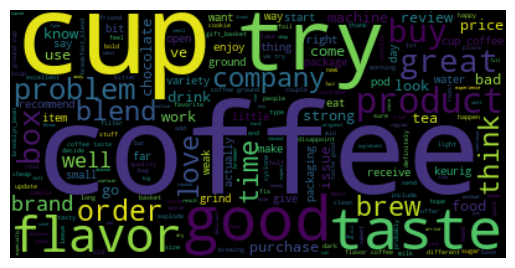

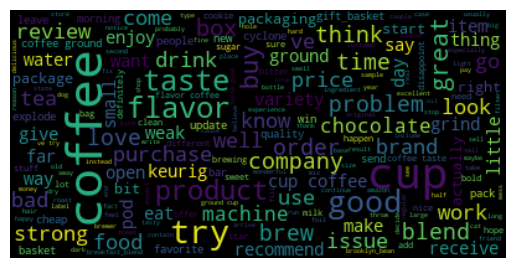

In [48]:
strings = []
for l in data_lemmatized:
    t = ' '.join(l)
    strings.append(t)
getWordCloud(strings)

In [49]:
important_columns = ['Id', 'Text', 'sentiment']
Updated_reviews_df = reviews_df[important_columns]


In [50]:
Updated_reviews_df

,Id,Text,sentiment
136322,136323,I have to say I was a little apprehensive to b...,Positive
516061,516062,Received my free K cups as a sample promotion ...,Positive
516078,516079,Brooklyn Bean Roastery Blend K-Cups are great ...,Positive
378692,378693,The shipment of the dog food was quick. Howev...,Neutral
136544,136545,"Brooklyn ""French Roast"" K-Cup Coffee is not on...",Negative
...,...,...,...
422837,422838,Even though this mix is not as spicy as I anti...,Positive
190697,190698,i've wanted one of these since i saw it in an ...,Positive
222780,222781,All of the chocolate arrived with out melting ...,Positive
131468,131469,I use this all the time! Good for BBQ ing or p...,Positive


## Further check on the dataset

In [51]:
# Assuming X contains your input features and y contains the corresponding labels
X = strings  # Assuming strings is your input data
y = Updated_reviews_df["sentiment"].to_numpy()  # Assuming df["sentiment"] contains your labels


In [52]:
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 500
Length of y: 339326


In [53]:
print("Length of X after loading:", len(X))
print("Length of y after loading:", len(y))


Length of X after loading: 500
Length of y after loading: 339326


In [54]:
# Check the shape of the DataFrame
print("Shape of DataFrame:", Updated_reviews_df.shape)

# Display the first few rows of the DataFrame
Updated_reviews_df.head


Shape of DataFrame: (339326, 3)


<bound method NDFrame.head of             Id                                               Text sentiment
136322  136323  I have to say I was a little apprehensive to b...  Positive
516061  516062  Received my free K cups as a sample promotion ...  Positive
516078  516079  Brooklyn Bean Roastery Blend K-Cups are great ...  Positive
378692  378693  The shipment of the dog food was quick.  Howev...   Neutral
136544  136545  Brooklyn "French Roast" K-Cup Coffee is not on...  Negative
...        ...                                                ...       ...
422837  422838  Even though this mix is not as spicy as I anti...  Positive
190697  190698  i've wanted one of these since i saw it in an ...  Positive
222780  222781  All of the chocolate arrived with out melting ...  Positive
131468  131469  I use this all the time! Good for BBQ ing or p...  Positive
183896  183897  I ordered this cereal based on the good review...  Negative

[339326 rows x 3 columns]>

## Check how balanced or skewed the dataset is

In [55]:
Updated_reviews_df['sentiment'].value_counts()


sentiment
Positive    264326
Negative     49402
Neutral      25598
Name: count, dtype: int64

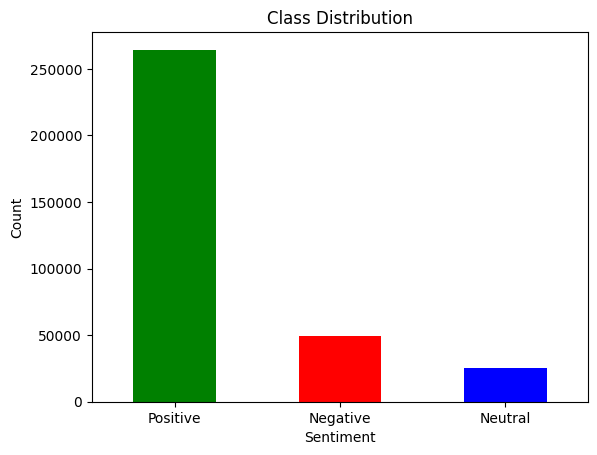

In [56]:
import matplotlib.pyplot as plt

# Plotting class distribution
class_counts = Updated_reviews_df['sentiment'].value_counts()
class_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [57]:
class_counts = Updated_reviews_df['sentiment'].value_counts()
imbalance_ratio = min(class_counts) / max(class_counts)
print("Imbalance ratio:", imbalance_ratio)


Imbalance ratio: 0.09684253535407035


## Resampling to balance the data set

In [58]:
X_train = X

In [59]:
y_train = Updated_reviews_df["sentiment"].to_numpy()


In [60]:
import numpy as np

# Check the lengths of X and y
print("Length of X:", len(X))
print("Length of y:", len(y))

# If the lengths are different, align X and y
if len(X) != len(y):
    # Determine the minimum length of X and y
    min_length = min(len(X), len(y))
    
    # Align X and y to the minimum length
    X_aligned = X[:min_length]
    y_aligned = y[:min_length]
    
    # Update X and y with the aligned data
    X = X_aligned
    y = y_aligned

# Verify the alignment by checking the lengths again
print("Length of X after alignment:", len(X))
print("Length of y after alignment:", len(y))


Length of X: 500
Length of y: 339326
Length of X after alignment: 500
Length of y after alignment: 500


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Instantiate TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit TF-IDF vectorizer and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Ensure that X_train_tfidf and y_train have the same number of samples
# You need to align X_train_tfidf and y_train before applying SMOTE

# Apply SMOTE only after aligning X_train_tfidf and y_train


In [64]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)


In [65]:
# Determine the minimum number of rows
min_rows = min(X_train_tfidf.shape[0], len(y_train))

# Align X_train_tfidf and y_train to the minimum rows
X_train_tfidf_aligned = X_train_tfidf[:min_rows]
y_train_aligned = y_train[:min_rows]


In [66]:
# Resample the aligned dataset using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf_aligned, y_train_aligned)


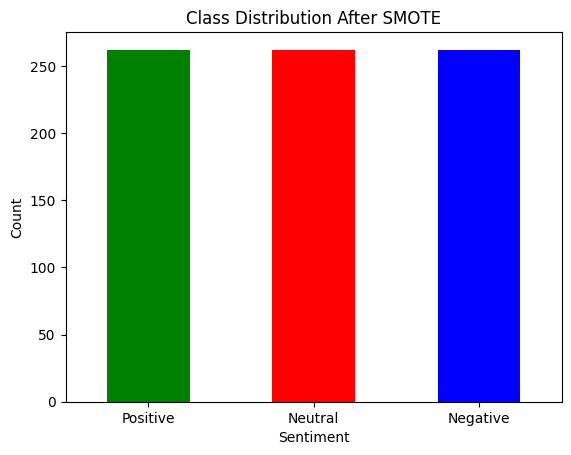

Class counts after resampling:
Positive    262
Neutral     262
Negative    262
Name: count, dtype: int64


In [67]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the resampled labels
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Plotting class distribution after resampling
class_counts_resampled.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

print("Class counts after resampling:")
print(class_counts_resampled)


## Split the data into training and testing

In [68]:

# Extract features (X) and labels (y)
X = Updated_reviews_df['Text'].tolist()
y = Updated_reviews_df['sentiment'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Check the lengths of the training features and labels
print("Number of training samples:", len(X_train))
print("Number of training labels:", len(y_train))


Number of training samples: 271460
Number of training labels: 271460


In [70]:
Updated_reviews_df

,Id,Text,sentiment
136322,136323,I have to say I was a little apprehensive to b...,Positive
516061,516062,Received my free K cups as a sample promotion ...,Positive
516078,516079,Brooklyn Bean Roastery Blend K-Cups are great ...,Positive
378692,378693,The shipment of the dog food was quick. Howev...,Neutral
136544,136545,"Brooklyn ""French Roast"" K-Cup Coffee is not on...",Negative
...,...,...,...
422837,422838,Even though this mix is not as spicy as I anti...,Positive
190697,190698,i've wanted one of these since i saw it in an ...,Positive
222780,222781,All of the chocolate arrived with out melting ...,Positive
131468,131469,I use this all the time! Good for BBQ ing or p...,Positive


## Vectorize the text data

In [71]:
# Vectorize the training features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

In [72]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Ensure that the vectorization process is consistent for training and test features
X_test_vectorized = vectorizer.transform(X_test)

# Applying machine learning models

 ## Multinomial Naive Bayes (MNB)

In [72]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)


MultinomialNB()

In [73]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7861963280582324
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.05      0.10      9906
     Neutral       0.00      0.00      0.00      5110
    Positive       0.79      1.00      0.88     52850

    accuracy                           0.79     67866
   macro avg       0.57      0.35      0.33     67866
weighted avg       0.75      0.79      0.70     67866



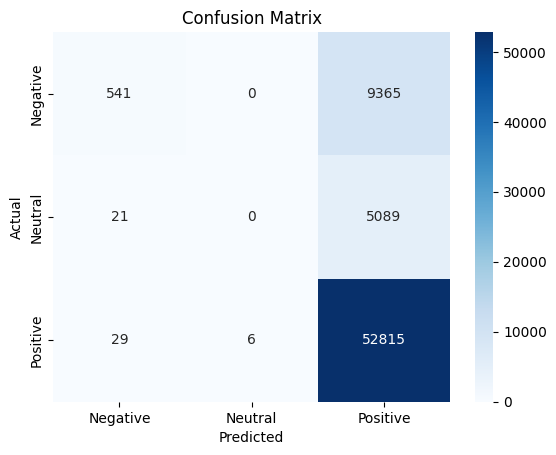

In [74]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Negative', 'Neutral', 'Positive']

# Plot confusion matrix as a heatmap with labeled classes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Hyperparameter tuning for optimization-Multinomial Naive Bayes (MNB)

In [75]:
# Define the parameter grid for alpha (smoothing parameter)
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [76]:
# Train the GridSearchCV object
grid_search.fit(X_train_vectorized, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy')

In [77]:
# Get the best estimator
best_clf = grid_search.best_estimator_


In [78]:
# Make predictions on the test data using the best estimator
y_pred = best_clf.predict(X_test_vectorized)


In [79]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'alpha': 0.1}
Best Accuracy: 0.814223089958005
Test Set Accuracy: 0.8139274452597767
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.27      0.41      9906
     Neutral       0.41      0.01      0.01      5110
    Positive       0.81      0.99      0.90     52850

    accuracy                           0.81     67866
   macro avg       0.68      0.42      0.44     67866
weighted avg       0.78      0.81      0.76     67866



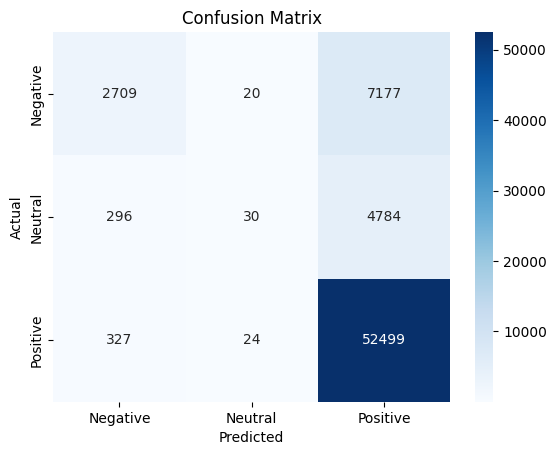

In [80]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Negative', 'Neutral', 'Positive']

# Plot confusion matrix as a heatmap with labeled classes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Logistic Regression

In [81]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('clf', LogisticRegression())  # Logistic Regression classifier
])

In [82]:

# Train the model
pipeline.fit(X_train, y_train)
# Predict on the test set
y_pred = pipeline.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print accuracy
print("Accuracy:", accuracy)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8674299354610556
Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.68      0.71      9906
     Neutral       0.48      0.18      0.26      5110
    Positive       0.90      0.97      0.93     52850

    accuracy                           0.87     67866
   macro avg       0.71      0.61      0.64     67866
weighted avg       0.85      0.87      0.85     67866



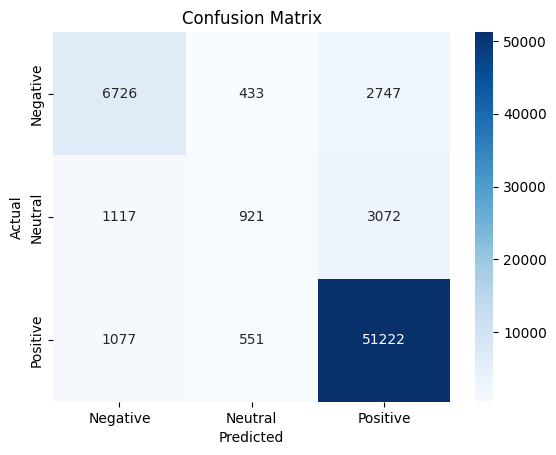

In [83]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Negative', 'Neutral', 'Positive']

# Plot confusion matrix as a heatmap with labeled classes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperpaprameter tuning-Logistic Regression

- Define Parameter Grid:
- Define a parameter grid specifying the hyperparameters to be tuned during grid search.
- In this case, hyperparameters include:
- C: Regularization parameter.
- penalty: Penalty type (L1 or L2 regularization).
- Perform Grid Search with Cross-Validation:
- Perform grid search with cross-validation (GridSearchCV) using the defined parameter grid.
- Use evaluation metrics to score each combination of hyperparameters.
- Search for the best combination of hyperparameters that optimizes the specified evaluation metrics.
- Get the Best Estimator:
- Retrieve the best estimator (logistic regression model with the best hyperparameters) obtained from grid search.
- These steps collectively constitute the hyperparameter tuning process using grid search with cross-validation. Each step contributes to finding the best combination of hyperparameters for the logistic regression model, which ultimately improves its performance.








In [84]:
# Assuming Updated_reviews_df is your DataFrame
# Extract features (X) and labels (y)
#X = Updated_reviews_df['Text']
#y = Updated_reviews_df['sentiment']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:


# Suppress warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [86]:
# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [87]:

# Vectorize the text data using TF-IDF
#vectorizer = TfidfVectorizer()
#X_train_vectorized = vectorizer.fit_transform(X_train)
#X_test_vectorized = vectorizer.transform(X_test)

# Define a parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty type (L1 or L2 regularization)
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),  # Set zero_division=1
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Initialize logistic regression classifier
clf = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring=scoring, refit='accuracy', verbose=1)
grid_search.fit(X_train_vectorized, y_train)

# Get the best estimator from grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_clf.predict(X_test_vectorized)

# Evaluate the model
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    so

Best parameters: {'C': 1.0, 'penalty': 'l2'}
Best accuracy: 0.8646909296516615
Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.68      0.71      9906
     Neutral       0.48      0.18      0.26      5110
    Positive       0.90      0.97      0.93     52850

    accuracy                           0.87     67866
   macro avg       0.71      0.61      0.64     67866
weighted avg       0.85      0.87      0.85     67866



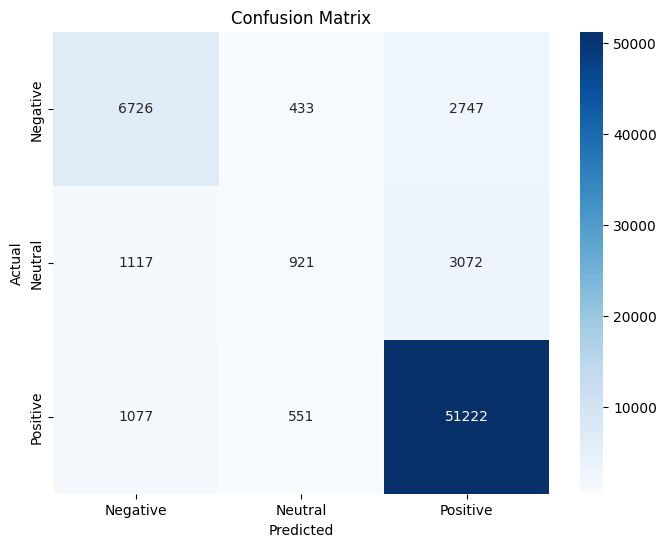

In [88]:
# Define label names
labels = ['Negative', 'Neutral', 'Positive']

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# DEEP LEARNING

# Function to plot the visualization of training history

In [73]:
def plot_training_history(history):
    
    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Recurrent Neural Network (RNN) with LSTM

In [74]:
# Assuming max_len is set to 100 (adjust as needed)
max_len = 100

# Define a mapping for sentiment labels
label_mapping = {"Positive": 0, "Neutral": 1, "Negative": 2}

# Convert string labels to integers using the mapping
label_data = Updated_reviews_df['sentiment'].replace(label_mapping).to_numpy()

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Updated_reviews_df['Text'])
sequences = tokenizer.texts_to_sequences(Updated_reviews_df['Text'])
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(sequences_padded, label_data, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len),  # Embedding layer
    LSTM(64, return_sequences=True),  # LSTM layer with 64 units
    LSTM(32),  # Another LSTM layer with 32 units
    Dense(len(label_mapping), activation='softmax')  # Output layer with softmax
])

C:\Users\746195\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [77]:
# Compile the model with sparse categorical crossentropy loss
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [78]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


Epoch 1/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 554s 65ms/step - accuracy: 0.8204 - loss: 0.5170 - val_accuracy: 0.8788 - val_loss: 0.3225
Epoch 2/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 577s 68ms/step - accuracy: 0.8972 - loss: 0.2759 - val_accuracy: 0.8853 - val_loss: 0.3045
Epoch 3/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 560s 66ms/step - accuracy: 0.9212 - loss: 0.2128 - val_accuracy: 0.8826 - val_loss: 0.3189
Epoch 4/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 564s 66ms/step - accuracy: 0.9417 - loss: 0.1613 - val_accuracy: 0.8747 - val_loss: 0.3601
Epoch 5/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 564s 66ms/step - accuracy: 0.9589 - loss: 0.1161 - val_accuracy: 0.8688 - val_loss: 0.4075


In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities on validation set
y_pred_probabilities = model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Classification report
report = classification_report(y_val, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)



2121/2121 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step
Classification Report:
              precision    recall  f1-score   support

    Positive       0.93      0.94      0.94     52850
     Neutral       0.39      0.37      0.38      5110
    Negative       0.74      0.72      0.73      9906

    accuracy                           0.87     67866
   macro avg       0.69      0.68      0.68     67866
weighted avg       0.87      0.87      0.87     67866



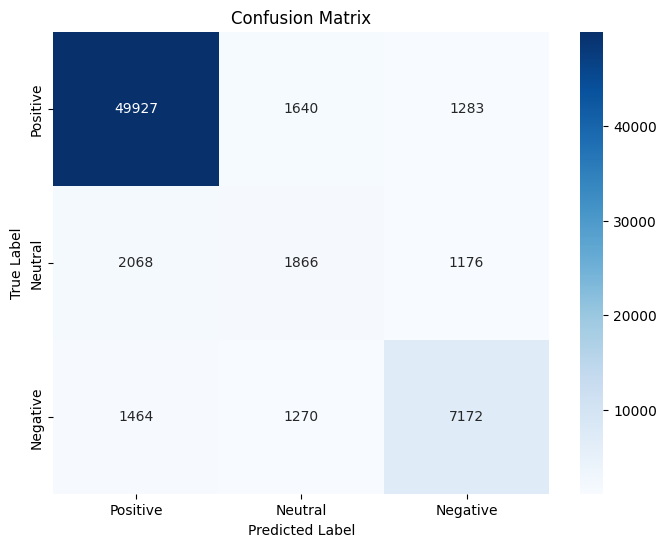

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


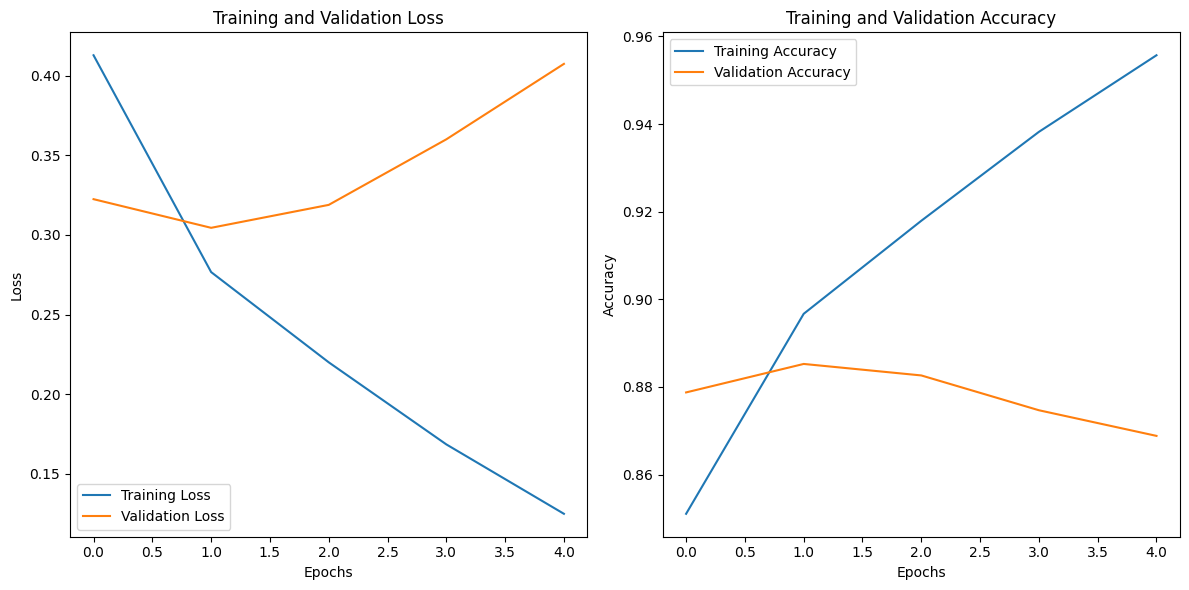

In [86]:
# Call the function to plot the history
plot_training_history(history)

## Hypertuning of Recurrent Neural Network (RNN) with LSTM

In [75]:

# Define the model architecture with increased LSTM layers
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len),  # Embedding layer
    LSTM(64, return_sequences=True),  # LSTM layer with 64 units
    LSTM(32, return_sequences=True),  # Additional LSTM layer with 32 units
    LSTM(16),  # Another LSTM layer with 16 units
    Dropout(0.3),  # Dropout layer with a dropout rate of 0.3
    Dense(len(label_mapping), activation='softmax')  # Output layer with softmax
])


# Reduce the batch size
batch_size = 16



In [77]:
# Adjust the learning rate
learning_rate = 0.001

# Use Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with sparse categorical crossentropy loss and custom optimizer

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [88]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam


# Define the model architecture with increased LSTM layers
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len),  # Embedding layer
    LSTM(64, return_sequences=True),  # LSTM layer with 64 units
    LSTM(32, return_sequences=True),  # Additional LSTM layer with 32 units
    LSTM(16),  # Another LSTM layer with 16 units
    Dropout(0.3),  # Dropout layer with a dropout rate of 0.3
    Dense(len(label_mapping), activation='softmax')  # Output layer with softmax
])

# Adjust the learning rate
learning_rate = 0.001

# Use Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with sparse categorical crossentropy loss and custom optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Reduce the batch size
batch_size = 16

In [78]:
# Train the model with adjusted batch size
history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/5
16967/16967 ━━━━━━━━━━━━━━━━━━━━ 1249s 73ms/step - accuracy: 0.8206 - loss: 0.5165 - val_accuracy: 0.8796 - val_loss: 0.3212
Epoch 2/5
16967/16967 ━━━━━━━━━━━━━━━━━━━━ 1188s 70ms/step - accuracy: 0.8929 - loss: 0.2889 - val_accuracy: 0.8833 - val_loss: 0.3054
Epoch 3/5
16967/16967 ━━━━━━━━━━━━━━━━━━━━ 1181s 70ms/step - accuracy: 0.9148 - loss: 0.2318 - val_accuracy: 0.8850 - val_loss: 0.3089
Epoch 4/5
16967/16967 ━━━━━━━━━━━━━━━━━━━━ 1171s 69ms/step - accuracy: 0.9363 - loss: 0.1790 - val_accuracy: 0.8692 - val_loss: 0.3475
Epoch 5/5
16967/16967 ━━━━━━━━━━━━━━━━━━━━ 1175s 69ms/step - accuracy: 0.9525 - loss: 0.1366 - val_accuracy: 0.8627 - val_loss: 0.4206


In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities on the validation set
y_pred_probabilities = model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Classification report
report = classification_report(y_val, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)



2121/2121 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step
Classification Report:
              precision    recall  f1-score   support

    Positive       0.93      0.94      0.94     52850
     Neutral       0.36      0.37      0.36      5110
    Negative       0.74      0.72      0.73      9906

    accuracy                           0.86     67866
   macro avg       0.68      0.67      0.68     67866
weighted avg       0.86      0.86      0.86     67866



In [82]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[49572  1924  1354]
 [ 2075  1874  1161]
 [ 1427  1379  7100]]


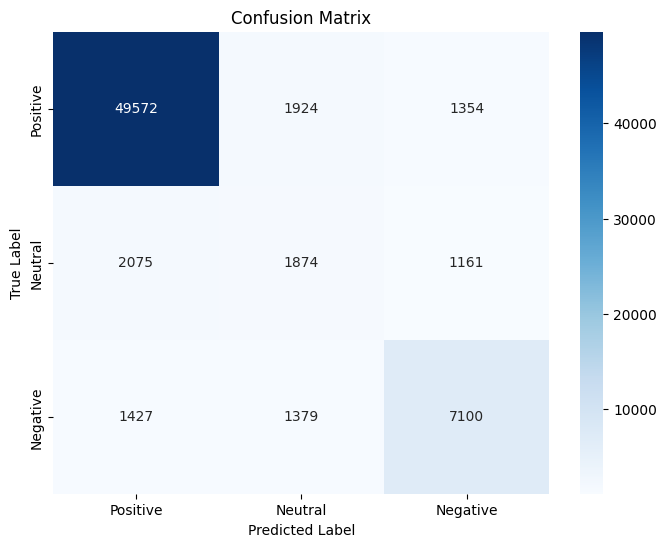

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


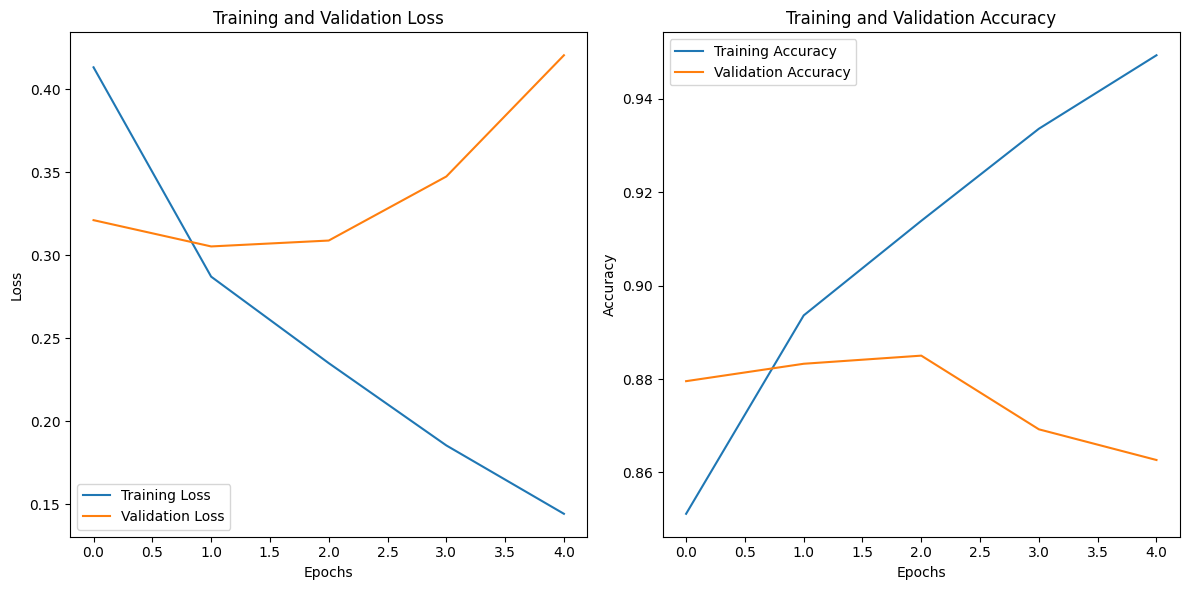

In [84]:
# Call the function to plot the history
plot_training_history(history)

In [ ]:


# Predict probabilities on the validation set
y_pred_probabilities = model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Classification report
report = classification_report(y_val, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)




In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities on the validation set
y_pred_probabilities = model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Classification report
report = classification_report(y_val, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)




2121/2121 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.91      0.92     52850
     Neutral       0.31      0.38      0.34      5110
    Negative       0.71      0.71      0.71      9906

    accuracy                           0.84     67866
   macro avg       0.65      0.67      0.66     67866
weighted avg       0.85      0.84      0.85     67866

Confusion Matrix:
[[48294  2920  1636]
 [ 1878  1938  1294]
 [ 1447  1445  7014]]


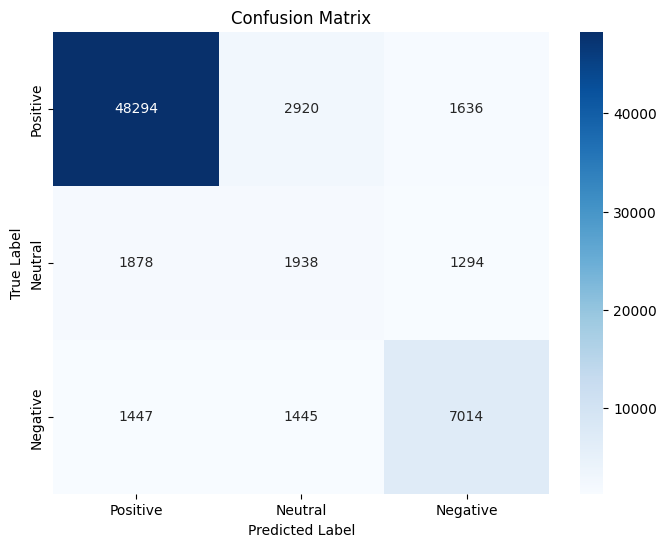

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Call the function to plot the history
plot_training_history(history)

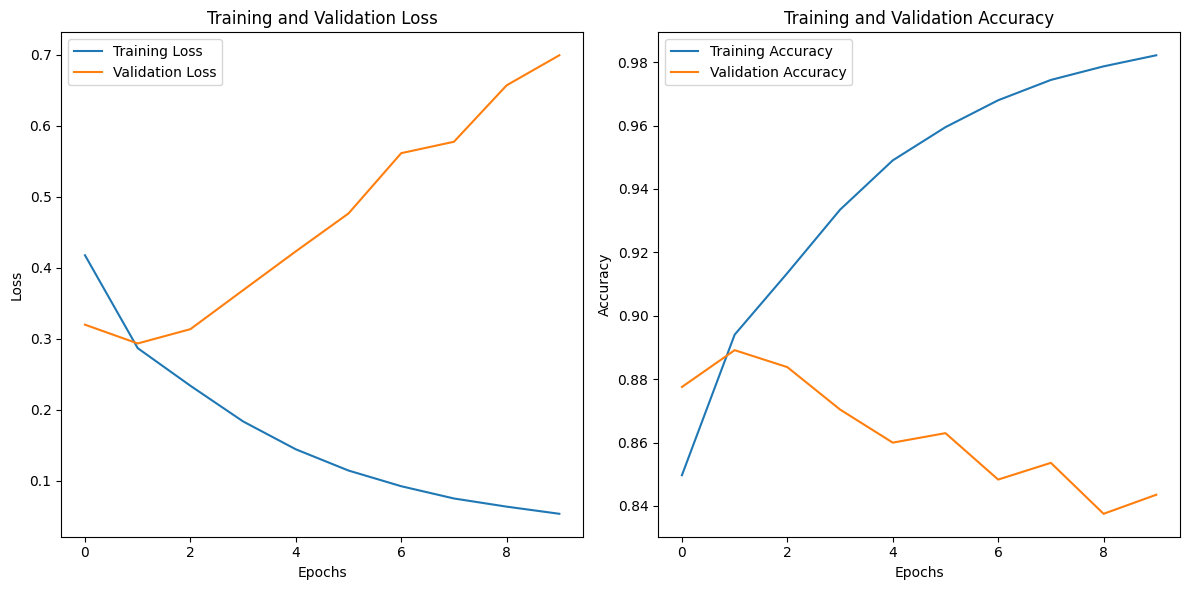

In [75]:
# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:

# Assuming max_len is set to 100 (adjust as needed)
max_len = 100

## Recurrent Neural Network (RNN) with GRU (Gated Recurrent Unit) layers

In [85]:
# Define a mapping for sentiment labels
label_mapping = {"Positive": 0, "Neutral": 1, "Negative": 2}

# Convert string labels to integers using the mapping
label_data = Updated_reviews_df['sentiment'].replace(label_mapping).to_numpy()

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Updated_reviews_df['Text'])
sequences = tokenizer.texts_to_sequences(Updated_reviews_df['Text'])
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(sequences_padded, label_data, test_size=0.2, random_state=42)

In [86]:
# Define the model architecture with GRU layers
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len),  # Embedding layer
    GRU(64, return_sequences=True),  # GRU layer with 64 units
    GRU(32),  # Another GRU layer with 32 units
    Dense(len(label_mapping), activation='softmax')  # Output layer with softmax
])

C:\Users\746195\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [87]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 581s 68ms/step - accuracy: 0.8371 - loss: 0.4619 - val_accuracy: 0.8825 - val_loss: 0.3040
Epoch 2/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 581s 69ms/step - accuracy: 0.9041 - loss: 0.2558 - val_accuracy: 0.8866 - val_loss: 0.3017
Epoch 3/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 586s 69ms/step - accuracy: 0.9278 - loss: 0.1927 - val_accuracy: 0.8782 - val_loss: 0.3251
Epoch 4/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 592s 70ms/step - accuracy: 0.9492 - loss: 0.1393 - val_accuracy: 0.8741 - val_loss: 0.3851
Epoch 5/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 584s 69ms/step - accuracy: 0.9652 - loss: 0.0978 - val_accuracy: 0.8682 - val_loss: 0.4428


In [89]:
# Make predictions on the validation data
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the classification report
report = classification_report(y_val, y_pred)
print(report)

2121/2121 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     52850
           1       0.39      0.38      0.39      5110
           2       0.75      0.71      0.73      9906

    accuracy                           0.87     67866
   macro avg       0.69      0.68      0.68     67866
weighted avg       0.87      0.87      0.87     67866



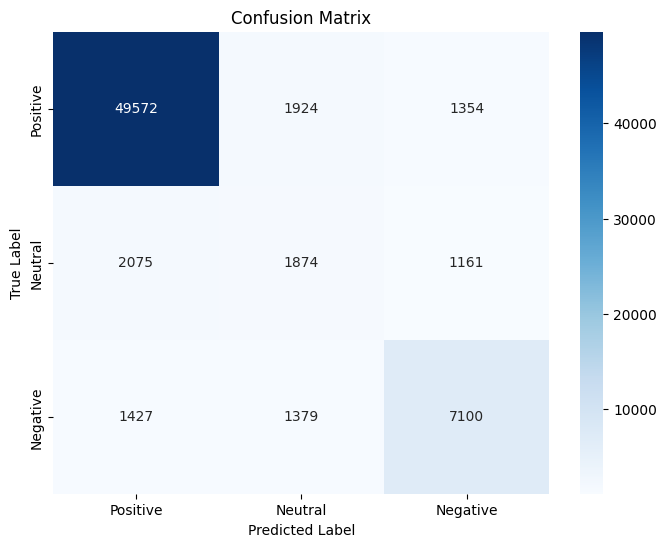

In [91]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


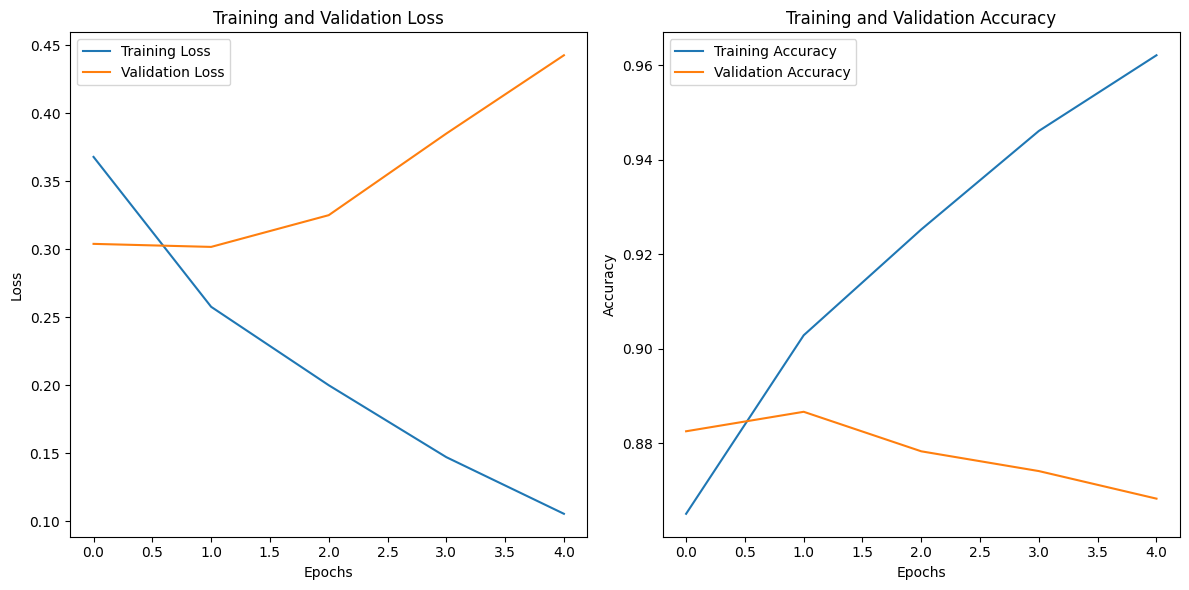

In [90]:
# Call the function to plot the history
plot_training_history(history)

In [94]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1004s 118ms/step - accuracy: 0.8387 - loss: 0.4544 - val_accuracy: 0.8881 - val_loss: 0.2987
Epoch 2/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1006s 119ms/step - accuracy: 0.9027 - loss: 0.2572 - val_accuracy: 0.8865 - val_loss: 0.3013
Epoch 3/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1014s 120ms/step - accuracy: 0.9277 - loss: 0.1945 - val_accuracy: 0.8849 - val_loss: 0.3216
Epoch 4/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1018s 120ms/step - accuracy: 0.9502 - loss: 0.1377 - val_accuracy: 0.8768 - val_loss: 0.3776
Epoch 5/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1033s 119ms/step - accuracy: 0.9661 - loss: 0.0955 - val_accuracy: 0.8709 - val_loss: 0.4439
Epoch 6/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1062s 121ms/step - accuracy: 0.9774 - loss: 0.0651 - val_accuracy: 0.8609 - val_loss: 0.5281
Epoch 7/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1017s 120ms/step - accuracy: 0.9833 - loss: 0.0480 - val_accuracy: 0.8593 - val_loss: 0.6123
Epoch 8/10
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1012s 119ms/s

In [95]:
# Make predictions on the validation data
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the classification report
report = classification_report(y_val, y_pred)
print(report)

2121/2121 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     52850
           1       0.35      0.35      0.35      5110
           2       0.71      0.68      0.70      9906

    accuracy                           0.85     67866
   macro avg       0.66      0.66      0.66     67866
weighted avg       0.85      0.85      0.85     67866



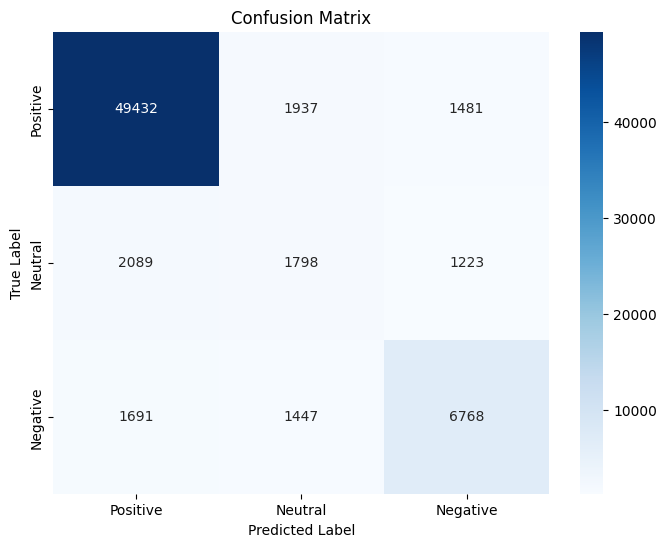

In [97]:

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


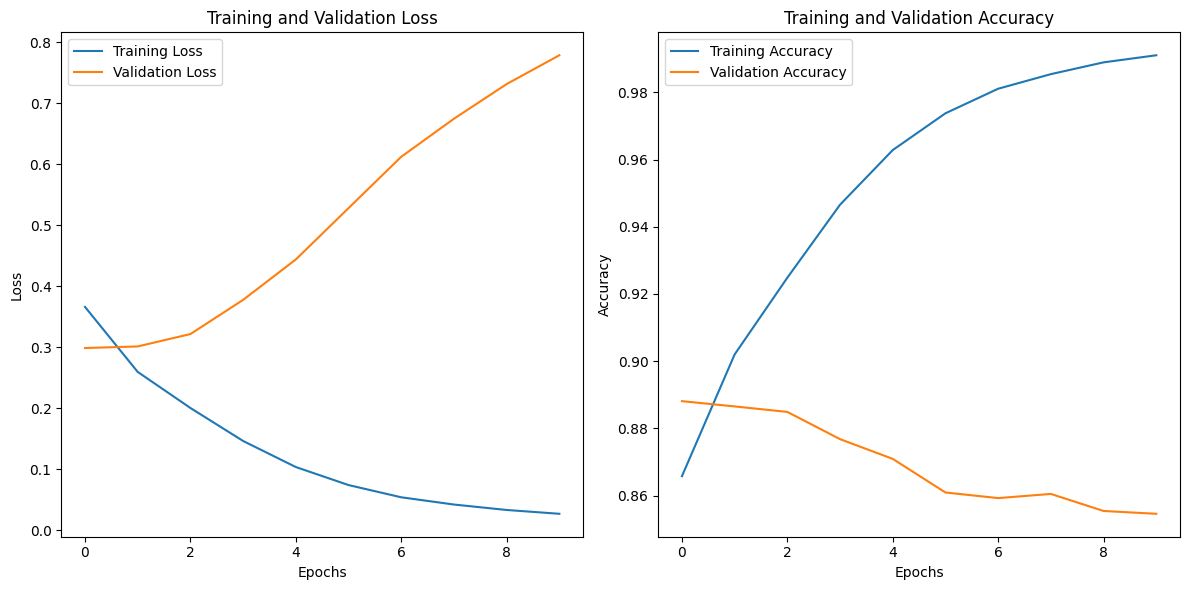

In [98]:
# Call the function to plot the history
plot_training_history(history)

## Hypertuning of Recurrent Neural Network (RNN) with GRU (Gated Recurrent Unit) layers

In [99]:
from keras.layers import Dropout

model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len),
    GRU(128, return_sequences=True),
    Dropout(0.2),  # Dropout layer with dropout rate of 0.2
    GRU(64),
    Dense(len(label_mapping), activation='softmax')
])


In [100]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1299s 153ms/step - accuracy: 0.8363 - loss: 0.4676 - val_accuracy: 0.8871 - val_loss: 0.2995
Epoch 2/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1290s 152ms/step - accuracy: 0.9014 - loss: 0.2613 - val_accuracy: 0.8902 - val_loss: 0.2909
Epoch 3/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1299s 153ms/step - accuracy: 0.9253 - loss: 0.2000 - val_accuracy: 0.8812 - val_loss: 0.3214
Epoch 4/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1270s 150ms/step - accuracy: 0.9484 - loss: 0.1430 - val_accuracy: 0.8704 - val_loss: 0.3887
Epoch 5/5
8484/8484 ━━━━━━━━━━━━━━━━━━━━ 1019s 120ms/step - accuracy: 0.9645 - loss: 0.0991 - val_accuracy: 0.8642 - val_loss: 0.4706


In [102]:
# Make predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = y_pred_prob.argmax(axis=1)  # Get the index of the class with the highest probability for each sample

# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)

print(report)


2121/2121 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     52850
           1       0.38      0.39      0.38      5110
           2       0.71      0.75      0.73      9906

    accuracy                           0.86     67866
   macro avg       0.68      0.69      0.68     67866
weighted avg       0.87      0.86      0.87     67866



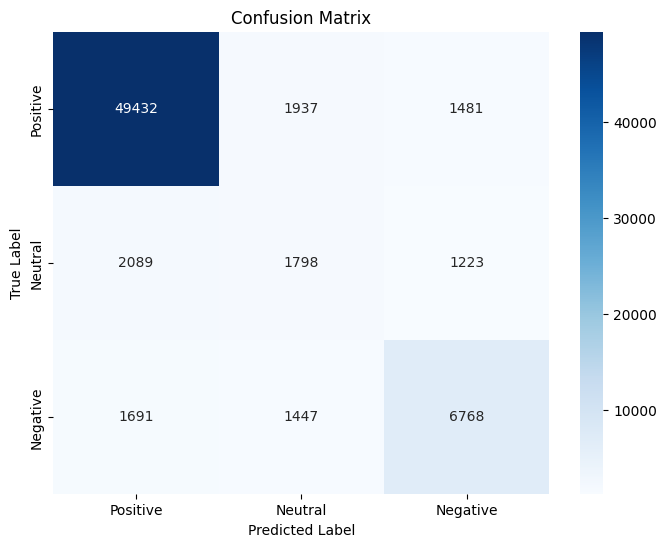

In [103]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


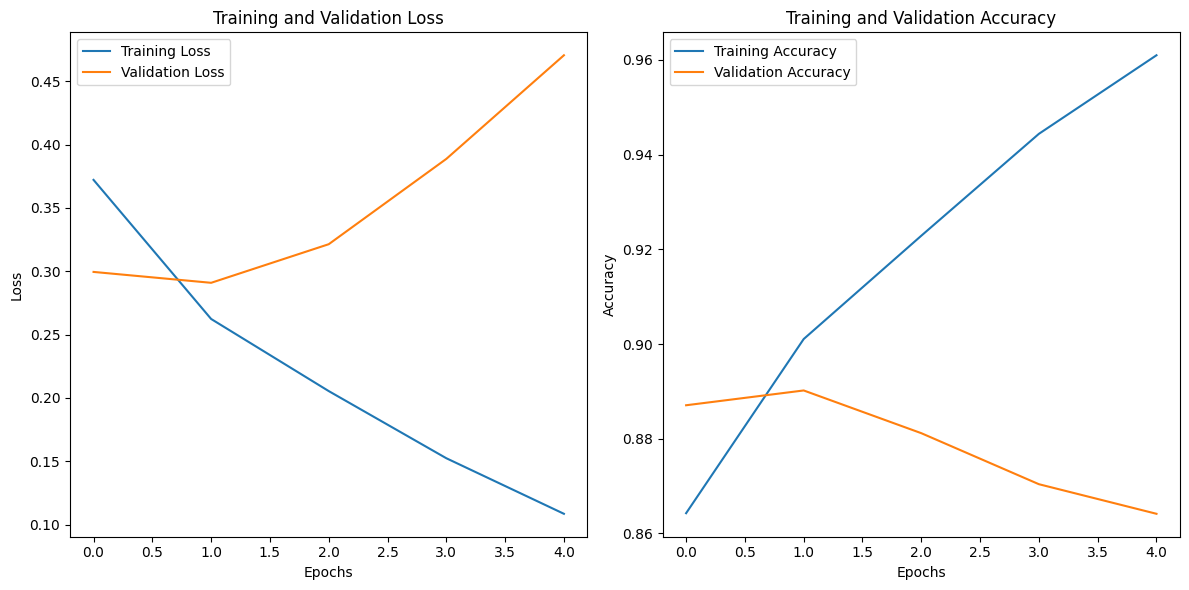

In [104]:
# Call the function to plot the history
plot_training_history(history)